Task 1

In [2]:
import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt

PyTorch Version: 2.7.1+cu126


Tutorial Example

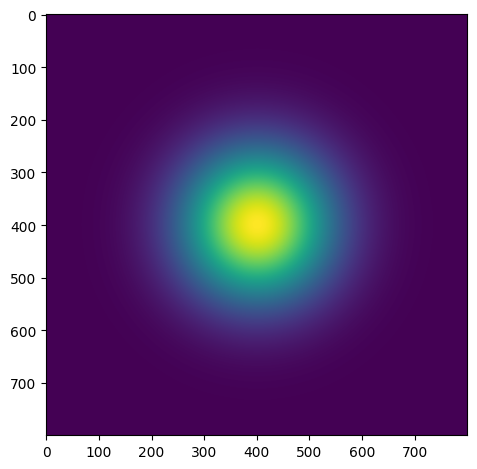

In [4]:
# Grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4.0:0.01, -4.0:4.0:0.01]

# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2 + y**2) / 2.0)

# Plot
plt.imshow(z.cpu().numpy())
plt.tight_layout()
plt.show()

Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

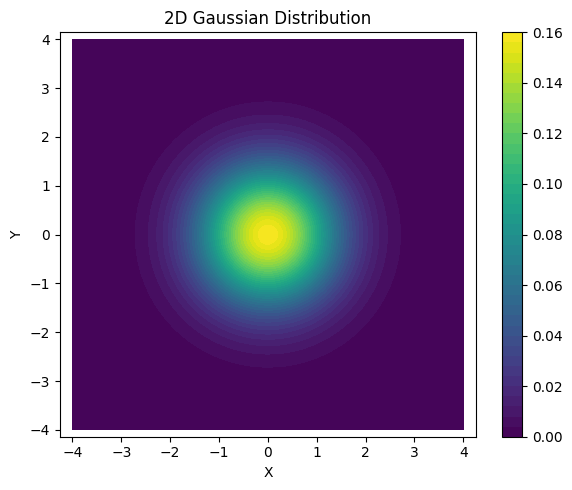

In [5]:
# Define parameters for the 2D Gaussian
mu_x, mu_y = 0.0, 0.0          # Mean
sigma_x, sigma_y = 1.0, 1.0    # Standard deviation

# Create a meshgrid over a 2D space
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Define the 2D Gaussian function
Z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(
    -(((X - mu_x) ** 2) / (2 * sigma_x ** 2) + ((Y - mu_y) ** 2) / (2 * sigma_y ** 2))
)

# Plot the surface
plt.figure(figsize=(6, 5))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.tight_layout()
plt.show()

Prompt: Now that you have a Gaussian function generated by AI, use similar code to create a 2D sine func-
tion (i.e. a sune function from PyTorch whose angle is dependent on x and y coordinates of the pixels)
and another plot of the resulting Tensor that shows the ‘stripes’ of this function

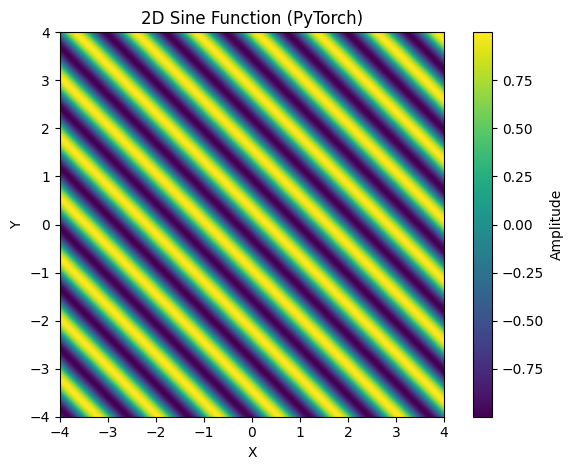

In [6]:
# Generate coordinate grid using torch
x = torch.linspace(-4, 4, 400)
y = torch.linspace(-4, 4, 400)
X, Y = torch.meshgrid(x, y, indexing='xy')

# Sine function with combined spatial frequency
kx, ky = 5.0, 5.0
Z = torch.sin(kx * X + ky * Y)

# Plot using matplotlib (convert to numpy)
plt.imshow(Z.numpy(), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.title('2D Sine Function (PyTorch)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

Gabor Filter

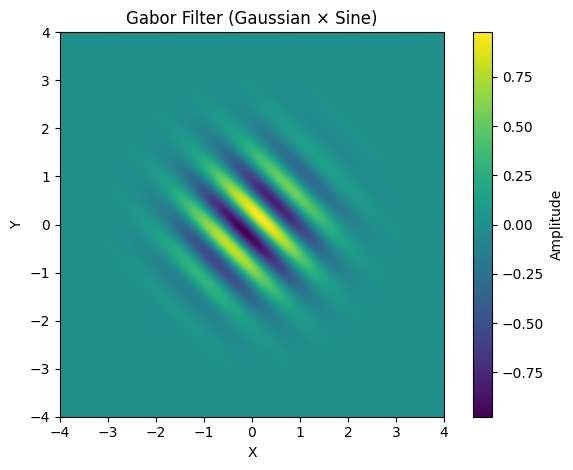

In [7]:
# Parameters for Gaussian
sigma = 1.0
gaussian = torch.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Parameters for sine function
kx, ky = 5.0, 5.0
sine_wave = torch.sin(kx * X + ky * Y)

# Element-wise multiplication (modulation)
gabor = gaussian * sine_wave

# Plot result
plt.imshow(gabor.numpy(), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.title('Gabor Filter (Gaussian × Sine)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

Gabor filter is like a stripe detector, only cares about particular angles, spacing and locations within the filtered section (the circle space in the middle). Application into feature extraction for detecting edges, textures and patterns in specific directions and scales

Task 2

/tmp/ipykernel_4249/213902109.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


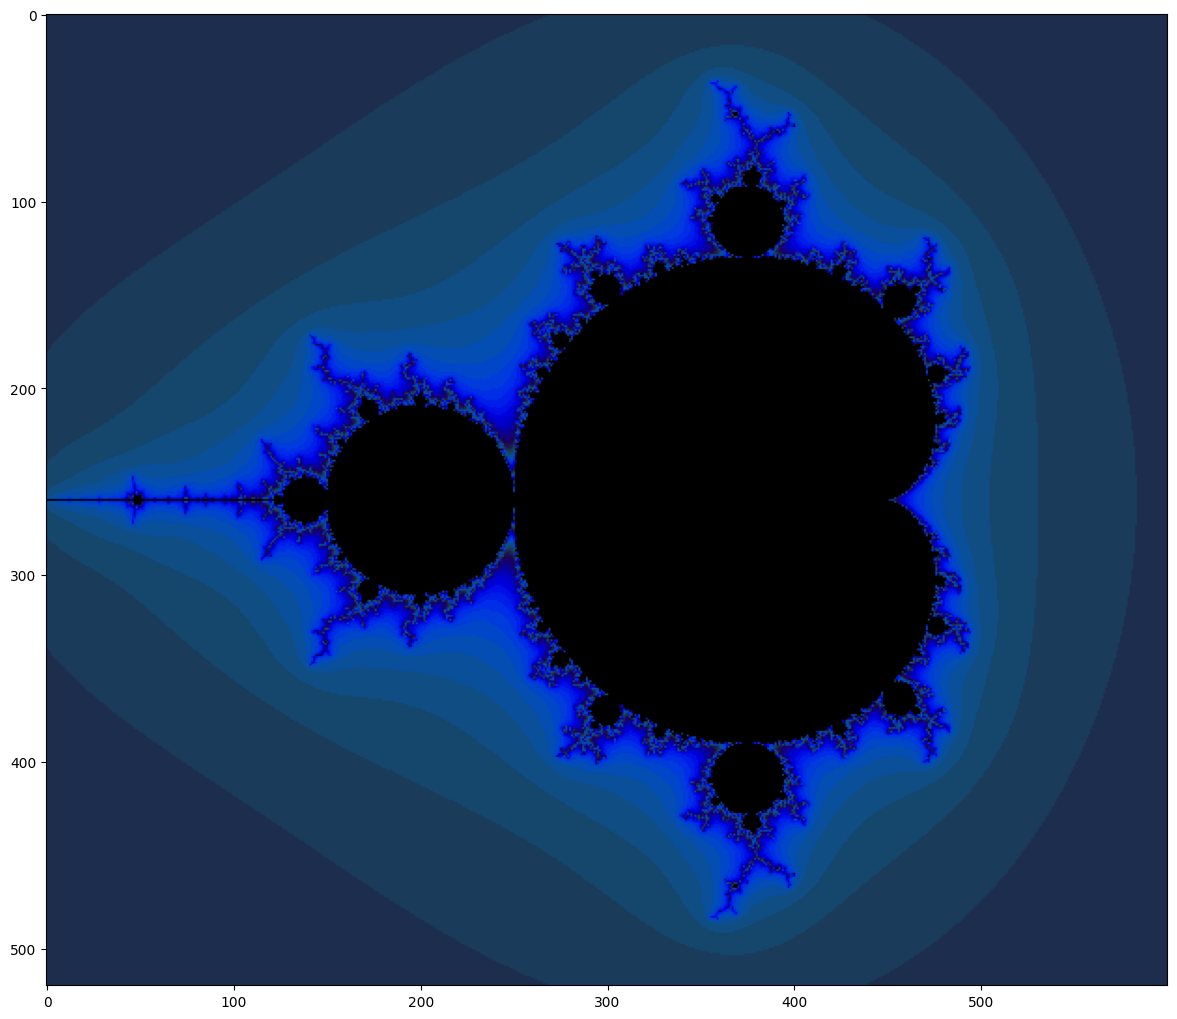

In [11]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005,-2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """
    Display an array of iteration counts as a
    colorful picture of a fractal.
    """

    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

AI Mandelbrot set

Prompt: Generate the Mandelbrot set implemented in PyTorch and that runs on the GPU (i.e. seems to run fast and allows fast rendering)

Originally AI expected the code to be run on commandline, so it generated parameters like:
foo.py [-h] [--width WIDTH] [--height HEIGHT]
                            [--centre-x CENTRE_X] [--centre-y CENTRE_Y]
                            [--scale SCALE] [--max-iter MAX_ITER]
                            [--escape-radius ESCAPE_RADIUS] [--device DEVICE]
                            [--tile-size TILE_SIZE] [--gamma GAMMA]
                            [--outfile OUTFILE]

Prompt: I am running it in a jupyter notebook, can you adjust so i can just run it once

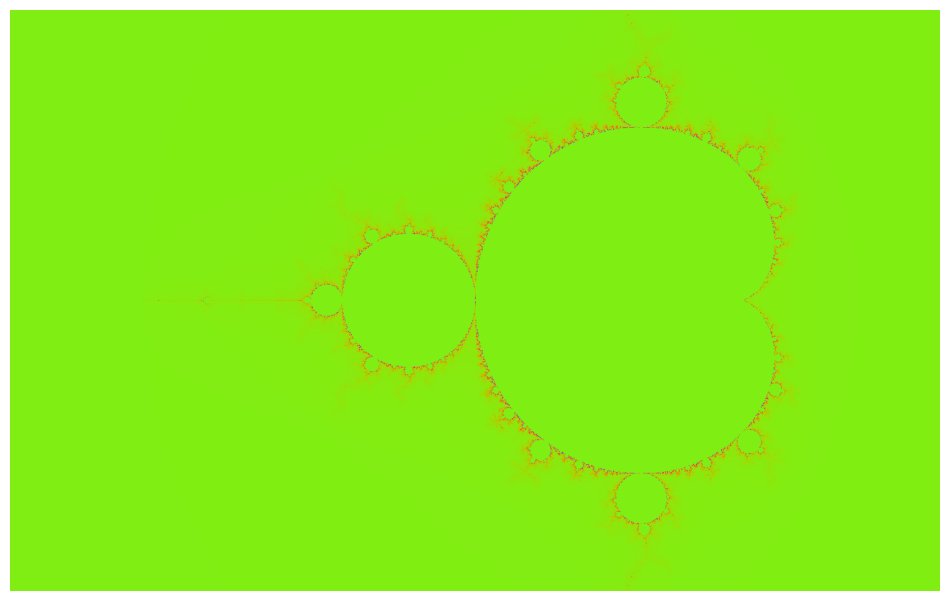

In [13]:
# Mandelbrot set with PyTorch on GPU (Jupyter-ready, single cell)
import torch
import matplotlib.pyplot as plt

# Auto-select device
if torch.cuda.is_available():
    device = torch.device("cuda")
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

@torch.no_grad()
def mandelbrot(width=1024, height=768, centre=(-0.75, 0.0), scale=3.5, max_iter=500, escape_radius=4.0):
    pixel_size = scale / width
    x_min = centre[0] - scale / 2.0
    y_min = centre[1] - (pixel_size * height) / 2.0

    xs = torch.linspace(x_min, x_min + pixel_size * (width - 1), width, device=device)
    ys = torch.linspace(y_min, y_min + pixel_size * (height - 1), height, device=device)

    X, Y = torch.meshgrid(xs, ys, indexing='xy')
    C = torch.complex(X, Y)
    Z = torch.zeros_like(C)

    counts = torch.zeros(C.shape, dtype=torch.int32, device=device)
    mask = torch.ones(C.shape, dtype=torch.bool, device=device)

    for i in range(1, max_iter + 1):
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius
        counts[mask & ~mask_new] = i
        mask = mask_new
        if not mask.any():
            break
    counts[mask] = max_iter
    return counts

def colourise(counts, max_iter=500):
    palette_size = 256
    t = (counts.float() / max_iter).clamp(0, 1)
    r = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.0))
    g = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.33))
    b = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.66))
    img = torch.stack([r, g, b], dim=-1)
    return (img * 255).byte().cpu().numpy()

# Parameters
width, height = 1600, 1000
centre_x, centre_y = -0.75, 0.0
scale = 3.5
max_iter = 1000

counts = mandelbrot(width, height, (centre_x, centre_y), scale, max_iter)
img = colourise(counts, max_iter)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


Why is it green LOLL

Prompt: Why is my graph green can i make it a nicer colour

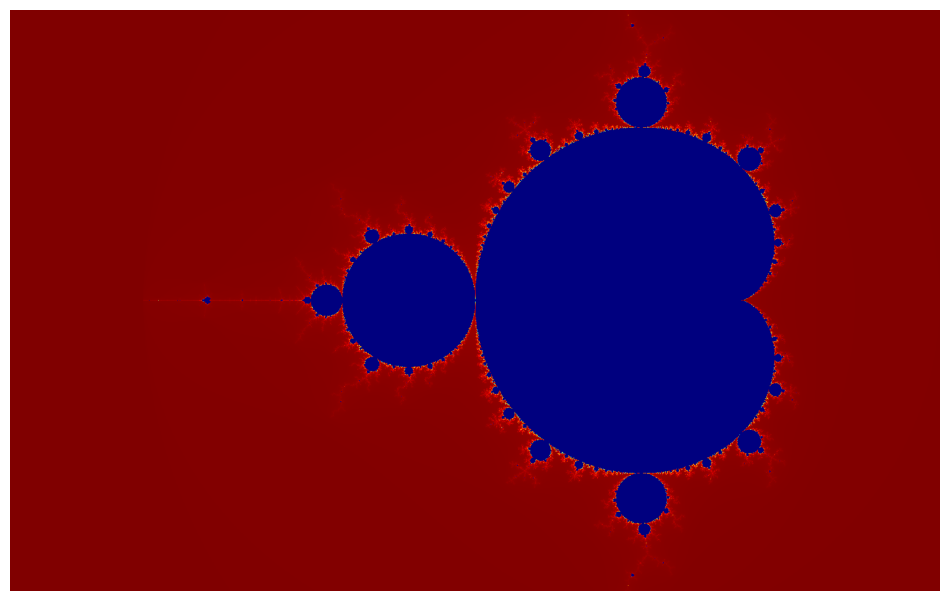

In [33]:
# Mandelbrot set with PyTorch on GPU (Jupyter-ready, single cell)
import torch
import matplotlib.pyplot as plt

# Auto-select device
if torch.cuda.is_available():
    device = torch.device("cuda")
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

@torch.no_grad()  # Disable gradient computation; not needed for Mandelbrot calculations
def mandelbrot_res(x_min, x_max, y_min, y_max, width=1600, height=1000, max_iter=1000, escape_radius=4.0):
    """
    Compute Mandelbrot set escape iteration counts for a grid of complex numbers.
    
    Args:
        x_min, x_max: float, bounds of the real axis
        y_min, y_max: float, bounds of the imaginary axis
        width, height: int, resolution of the output image
        max_iter: int, maximum number of iterations to check for escape
        escape_radius: float, squared magnitude threshold for escape
        
    Returns:
        counts: tensor of shape (height, width) containing iteration counts until escape
    """

    # Create 1D arrays of evenly spaced real and imaginary coordinates
    xs = torch.linspace(x_min, x_max, width, device=device)  # Real axis values
    ys = torch.linspace(y_min, y_max, height, device=device)  # Imaginary axis values

    # Create 2D coordinate grids from 1D arrays
    # indexing='xy' ensures X corresponds to columns, Y corresponds to rows
    X, Y = torch.meshgrid(xs, ys, indexing='xy')

    # Each pixel represents a complex number C = X + iY
    C = torch.complex(X, Y)

    # Initialise Z as 0 for all pixels; Mandelbrot iteration starts with Z_0 = 0
    Z = torch.zeros_like(C)

    # Tensor to store number of iterations until escape for each pixel
    counts = torch.zeros(C.shape, dtype=torch.int32, device=device)

    # Boolean mask indicating pixels still being iterated (not escaped yet)
    mask = torch.ones(C.shape, dtype=torch.bool, device=device)

    # Iteratively apply Mandelbrot formula: Z = Z^2 + C
    for i in range(1, max_iter + 1):
        # Only update pixels that have not yet escaped
        Z[mask] = Z[mask] * Z[mask] + C[mask]

        # Determine which pixels are still within the escape radius
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius

        # Record iteration number for pixels that just escaped this iteration
        counts[mask & ~mask_new] = i

        # Update mask for the next iteration
        mask = mask_new

        # Early exit: if all points have escaped, stop iterating to save computation
        if not mask.any():
            break

    # Assign max iteration count to points that never escaped (belong to the Mandelbrot set)
    counts[mask] = max_iter

    return counts  # Return the iteration count grid

# Parameters
width, height = 1600, 1000
centre_x, centre_y = -0.75, 0.0
scale = 3.5
max_iter = 1000

counts = mandelbrot(width, height, (centre_x, centre_y), scale, max_iter)
img = colourise(counts, max_iter)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

2.3 Demo

In [34]:
def colourise(counts, max_iter=1000):
    """
    Map Julia set iteration counts to RGB colours.
    
    Args:
        counts: tensor of iteration counts
        max_iter: maximum iterations used (for normalisation)
        
    Returns:
        img: numpy array of shape (height, width, 3) with RGB values
    """
    # Normalise counts to [0,1] range
    t = (counts.float() / max_iter).clamp(0, 1)
    # Generate red channel: oscillates based on normalised iteration
    r = torch.clamp(1.5 - torch.abs(4 * t - 1.0), 0, 1)
    # Generate green channel: phase-shifted relative to red
    g = torch.clamp(1.5 - torch.abs(4 * t - 2.0), 0, 1)
    # Generate blue channel: further phase-shifted
    b = torch.clamp(1.5 - torch.abs(4 * t - 3.0), 0, 1)
    # Combine channels into an RGB image
    img = torch.stack([r, g, b], dim=-1)
    # Convert to 8-bit integers for plotting and move to CPU as NumPy array
    return (img * 255).byte().cpu().numpy()

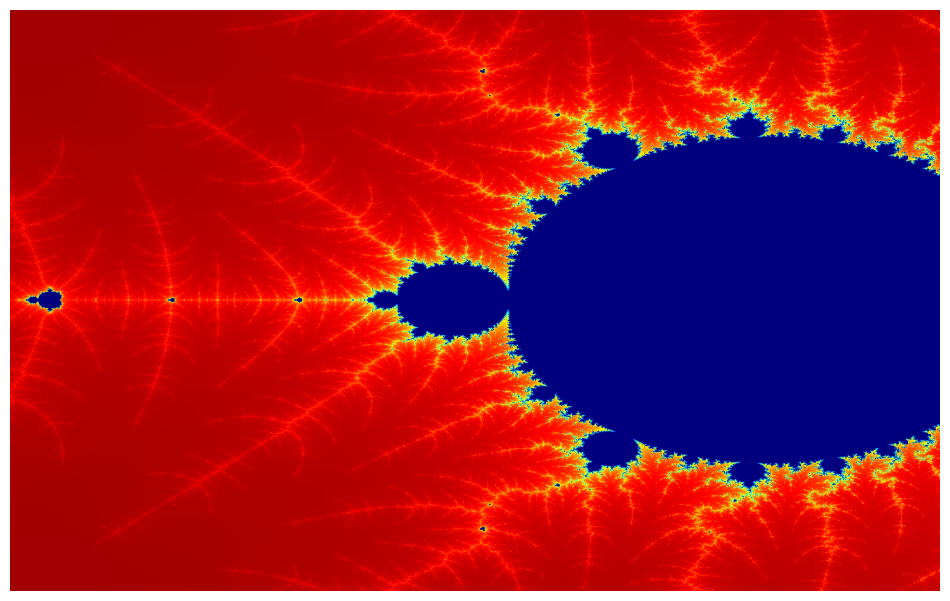

In [35]:
# -----------------------------
# Parameters for deep zoom
# -----------------------------
x_min, x_max = -1.405, -1.395  # Real axis bounds for the zoomed region
y_min, y_max = -0.005, 0.005  # Imaginary axis bounds for the zoomed region
width, height = 1600, 1000  # Resolution of the output image
max_iter = 1000  # Maximum iterations to determine escape

# Compute Mandelbrot escape counts for the specified region
counts = mandelbrot_res(x_min, x_max, y_min, y_max, width, height, max_iter)

# Convert iteration counts to RGB colours (function defined elsewhere)
img = colourise(counts, max_iter)

# Display the resulting Mandelbrot image
plt.figure(figsize=(12, 8))  # Figure size in inches
plt.imshow(img)  # Display the RGB image
plt.axis('off')  # Hide axes for a clean image
plt.show()  # Render the plot


Julia Set

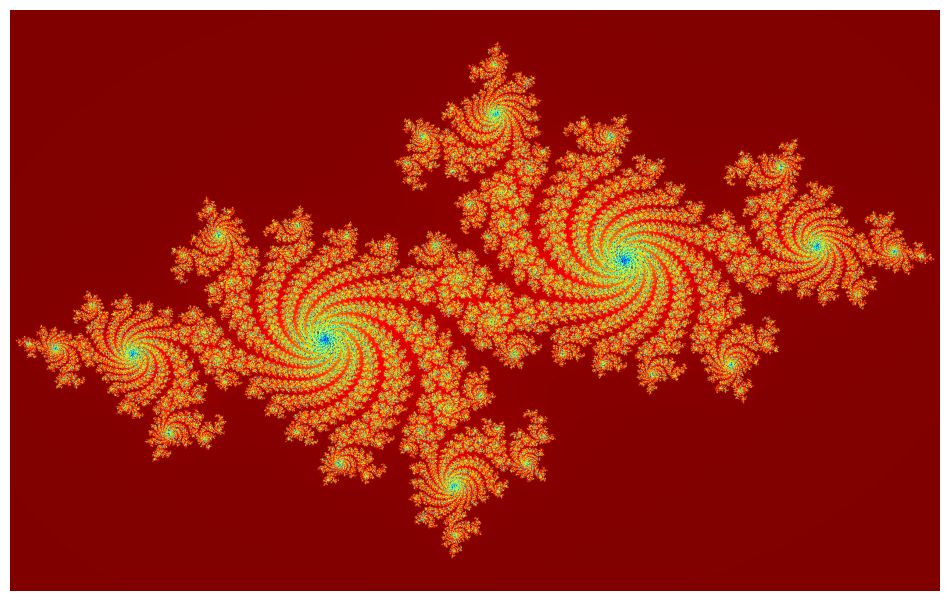

In [36]:
import torch  # PyTorch for GPU-accelerated tensor computation
import matplotlib.pyplot as plt  # For plotting images

# Select GPU if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

@torch.no_grad()  # Disable gradient tracking (we don't need autograd for this)
def julia_res(x_min, x_max, y_min, y_max, width=1600, height=1000, max_iter=1000, escape_radius=4.0, C=complex(-0.7, 0.27015)):
    """
    Compute the Julia set escape iteration counts for a grid of complex numbers.
    
    Args:
        x_min, x_max: float, bounds of real axis
        y_min, y_max: float, bounds of imaginary axis
        width, height: int, pixel dimensions of the output image
        max_iter: int, maximum iterations to determine escape
        escape_radius: float, squared radius beyond which points are considered escaped
        C: complex constant defining the Julia set
        
    Returns:
        counts: tensor of shape (height, width) with escape iteration per pixel
    """
    
    # Create 1D arrays of evenly spaced coordinates along x and y axes
    xs = torch.linspace(x_min, x_max, width, device=device)  # Real axis
    ys = torch.linspace(y_min, y_max, height, device=device)  # Imaginary axis
    
    # Create 2D coordinate grid for complex plane
    X, Y = torch.meshgrid(xs, ys, indexing='xy')  # 'xy' ensures X corresponds to columns, Y to rows
    
    # Initialize Z for each pixel as the complex number corresponding to that pixel
    Z = torch.complex(X, Y)  # Z varies across the plane; initial Z_0 = pixel coordinate
    
    # Fix the complex constant C across the entire grid
    # This creates the Julia set for a single chosen C
    C = torch.full_like(Z, complex(C.real, C.imag))  
    
    # Tensor to store the number of iterations until escape for each pixel
    counts = torch.zeros(Z.shape, dtype=torch.int32, device=device)
    
    # Boolean mask of points still being iterated (not escaped yet)
    mask = torch.ones(Z.shape, dtype=torch.bool, device=device)
    
    # Iteratively apply the Julia set formula: Z = Z^2 + C
    for i in range(1, max_iter + 1):
        # Only update pixels that have not yet escaped
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        
        # Determine which pixels are still within the escape radius
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius
        
        # Record the iteration count for pixels that just escaped this iteration
        counts[mask & ~mask_new] = i
        
        # Update the mask for next iteration
        mask = mask_new
        
        # If all points have escaped, exit early for efficiency
        if not mask.any():
            break
    
    # Assign max iteration count to points that never escaped
    counts[mask] = max_iter
    
    return counts  # Return the iteration count grid

# -----------------------------
# Parameters for Julia set image
# -----------------------------
x_min, x_max = -1.5, 1.5  # Real axis bounds
y_min, y_max = -1.0, 1.0  # Imaginary axis bounds
width, height = 1600, 1000  # Image resolution
max_iter = 1000  # Maximum iterations
C = complex(-0.7, 0.27015)  # Julia constant, can change for different shapes

# Compute Julia set iteration counts
counts = julia_res(x_min, x_max, y_min, y_max, width, height, max_iter, C=C)

# Convert iteration counts to RGB image
img = colourise(counts, max_iter)

# Plot the Julia set image
plt.figure(figsize=(12, 8))
plt.imshow(img)  # Display the RGB image
plt.axis('off')  # Hide axes for clean visualisation
plt.show()


Part 3

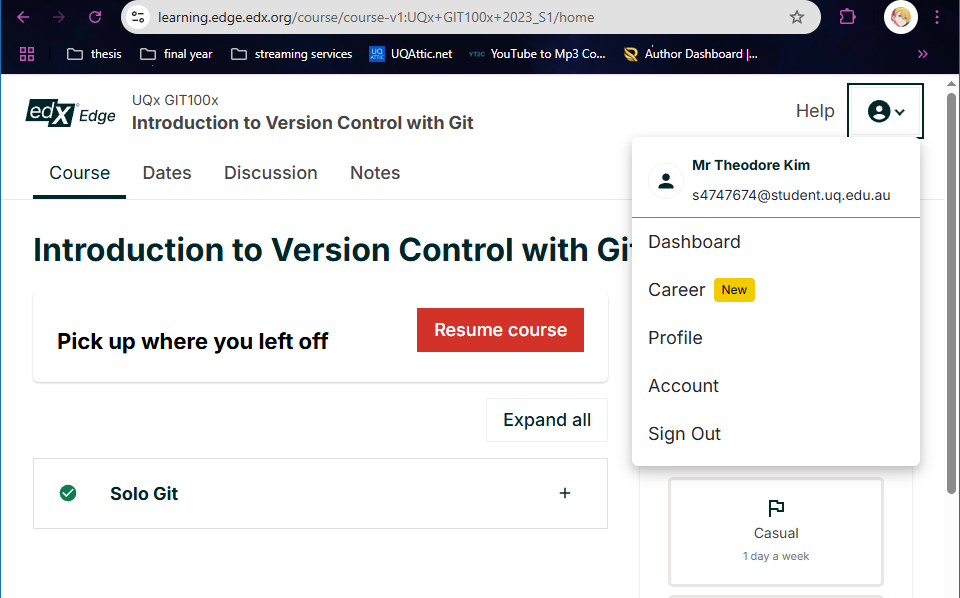

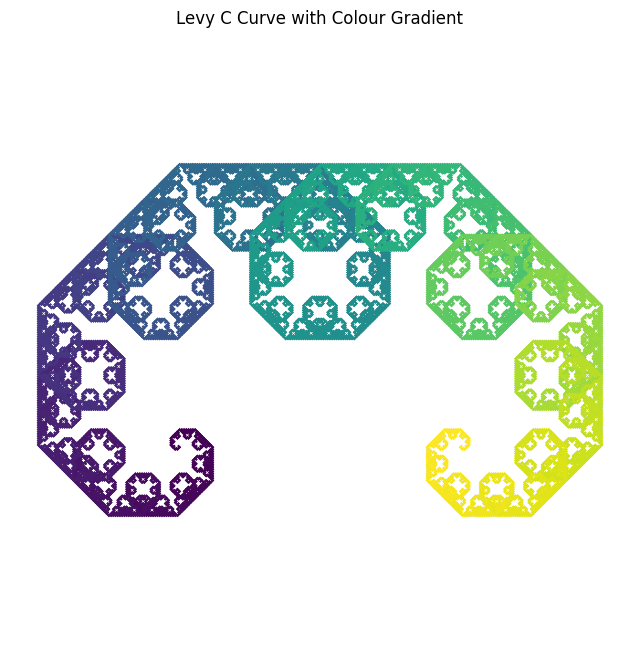

Estimated fractal dimension (box-counting): 2.0000


In [31]:
def levy_c_curve(start, end, depth):
    """Generate Levy C curve points recursively."""
    if depth == 0:
        return torch.stack([start, end], dim=0)
    
    vec = end - start
    rotation = torch.tensor([[0.5, -0.5], [0.5, 0.5]], device=device)
    mid = start + vec @ rotation.T
    
    left = levy_c_curve(start, mid, depth-1)
    right = levy_c_curve(mid, end, depth-1)
    return torch.cat([left[:-1], right], dim=0)

# --- Fractal generation ---
p0 = torch.tensor([0.0, 0.0], device=device)
p1 = torch.tensor([1.0, 0.0], device=device)
depth = 15  # reduce for faster execution on CPU

points = levy_c_curve(p0, p1, depth).cpu().numpy()

# --- Colour gradient based on recursion index ---
n_points = points.shape[0]
colors = plt.cm.viridis(np.linspace(0, 1, n_points))

# --- Plot main curve with gradient ---
plt.figure(figsize=(8, 8))
for i in range(n_points-1):
    plt.plot(points[i:i+2,0], points[i:i+2,1], color=colors[i])
plt.axis('equal')
plt.axis('off')
plt.title("Levy C Curve with Colour Gradient")
plt.show()

# --- Box-counting fractal dimension ---
def fractal_dimension(Z, threshold=0.5):
    # Only for 2D array
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where(S > 0)[0])
    
    Z = (Z < threshold)
    sizes = 2 ** np.arange(1, int(np.log2(min(Z.shape))), 1)
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

# Rasterize points to grid for fractal dimension
grid_size = 2**10
grid = np.zeros((grid_size, grid_size))

x = ((points[:,0] - points[:,0].min()) / np.ptp(points[:,0]) * (grid_size-1)).astype(int)
y = ((points[:,1] - points[:,1].min()) / np.ptp(points[:,1]) * (grid_size-1)).astype(int)

grid[y, x] = 1


fd = fractal_dimension(grid)
print(f"Estimated fractal dimension (box-counting): {fd:.4f}")
